<a href="https://colab.research.google.com/github/williamlapa/python_financas_previsao/blob/main/Python_para_finan%C3%A7as_s%C3%A9ries_temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Séries temporais em bases financeiras - ARIMA

## Instalação e importação das bibliotecas

In [ ]:
!pip install pmdarima

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima

## Carregamento da base de dados

In [ ]:
dateparse = lambda dates: datetime.datetime.strptime(dates, '%Y-%m-%d')
dataset = pd.read_csv('acoes.csv', parse_dates=['Date'], index_col='Date',
                      date_parser = dateparse, usecols = ['Date', 'BOVA'])

In [ ]:
dataset

,BOVA
Date,
2015-01-02,47.259998
2015-01-05,46.320000
2015-01-06,46.580002
2015-01-07,48.150002
2015-01-08,48.509998
...,...
2020-10-27,95.800003
2020-10-28,92.430000
2020-10-29,92.910004


In [ ]:
time_series = dataset['BOVA']

In [ ]:
time_series

Date
2015-01-02    47.259998
2015-01-05    46.320000
2015-01-06    46.580002
2015-01-07    48.150002
2015-01-08    48.509998
                ...    
2020-10-27    95.800003
2020-10-28    92.430000
2020-10-29    92.910004
2020-10-30    90.660004
2020-11-03    92.410004
Name: BOVA, Length: 1446, dtype: float64

## Exploração da série temporal

In [ ]:
time_series[1]

46.31999969482422

In [ ]:
time_series['2015-01-08']

48.5099983215332

In [ ]:
time_series['2015-01-01':'2015-01-10']

Date
2015-01-02    47.259998
2015-01-05    46.320000
2015-01-06    46.580002
2015-01-07    48.150002
2015-01-08    48.509998
2015-01-09    47.529999
Name: BOVA, dtype: float64

In [ ]:
time_series[:'2015-07-31']

Date
2015-01-02    47.259998
2015-01-05    46.320000
2015-01-06    46.580002
2015-01-07    48.150002
2015-01-08    48.509998
                ...    
2015-07-27    47.349998
2015-07-28    48.180000
2015-07-29    48.740002
2015-07-30    48.430000
2015-07-31    49.369999
Name: BOVA, Length: 144, dtype: float64

In [ ]:
time_series['2015']

Date
2015-01-02    47.259998
2015-01-05    46.320000
2015-01-06    46.580002
2015-01-07    48.150002
2015-01-08    48.509998
                ...    
2015-12-22    42.230000
2015-12-23    42.750000
2015-12-28    42.500000
2015-12-29    42.419998
2015-12-30    42.130001
Name: BOVA, Length: 246, dtype: float64

In [ ]:
time_series.index.max()

Timestamp('2020-11-03 00:00:00')

In [ ]:
time_series.index.min()

Timestamp('2015-01-02 00:00:00')

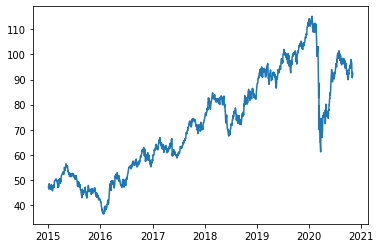

In [ ]:
plt.plot(time_series);

In [ ]:
figura = px.line(title='Histórico do preço das ações')
figura.add_scatter(x = time_series.index, y = time_series)

In [ ]:
time_series_datas = time_series['2015-01-01':'2015-12-31']

In [ ]:
time_series_datas

Date
2015-01-02    47.259998
2015-01-05    46.320000
2015-01-06    46.580002
2015-01-07    48.150002
2015-01-08    48.509998
                ...    
2015-12-22    42.230000
2015-12-23    42.750000
2015-12-28    42.500000
2015-12-29    42.419998
2015-12-30    42.130001
Name: BOVA, Length: 246, dtype: float64

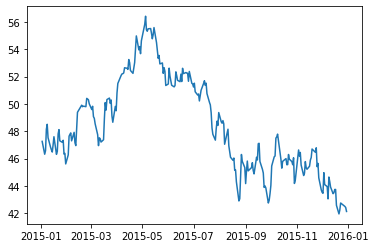

In [ ]:
plt.plot(time_series_datas);

## Decomposição da série temporal

In [ ]:
type(time_series)

pandas.core.series.Series

In [ ]:
len(time_series) / 2

723.0

In [ ]:
decomposicao = seasonal_decompose(time_series, period=len(time_series) // 2)

In [ ]:
tendencia = decomposicao.trend
sazonal = decomposicao.seasonal
aleatorio = decomposicao.resid

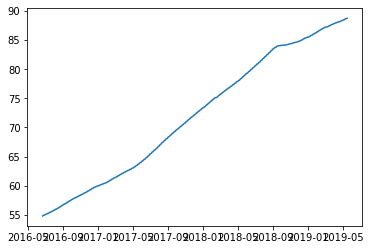

In [ ]:
plt.plot(tendencia);

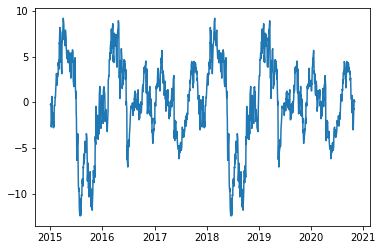

In [ ]:
plt.plot(sazonal);

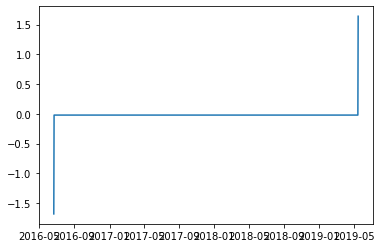

In [ ]:
plt.plot(aleatorio);

## Previsões com ARIMA

In [ ]:
modelo = auto_arima(time_series, suppress_warnings=True, error_action='ignore')

In [ ]:
# Parâmetros P, Q e D
modelo.order

(4, 1, 4)

In [ ]:
previsoes = modelo.predict(n_periods=90)

In [ ]:
previsoes

array([92.05991453, 91.65845681, 91.68549057, 90.84792147, 91.06175   ,
       90.26460691, 90.40826765, 90.00100401, 89.93779321, 89.99904692,
       89.77471652, 90.13961749, 89.91447893, 90.31934722, 90.24253432,
       90.48321734, 90.59828332, 90.61594483, 90.84817461, 90.71619714,
       90.93293436, 90.77808522, 90.87258015, 90.7903891 , 90.73634178,
       90.74811417, 90.59969207, 90.66331712, 90.51140267, 90.56517562,
       90.48277237, 90.48845974, 90.49716491, 90.45773641, 90.52870674,
       90.47687056, 90.55795342, 90.52937821, 90.57782385, 90.58842364,
       90.59041179, 90.63016366, 90.59999902, 90.64333921, 90.60790803,
       90.63117059, 90.61184935, 90.60625489, 90.60877489, 90.58250218,
       90.59824115, 90.56868506, 90.58366279, 90.56625056, 90.5707712 ,
       90.57123532, 90.56454593, 90.5781154 , 90.56667563, 90.58306511,
       90.57499695, 90.58515446, 90.5849959 , 90.58554819, 90.59227749,
       90.58582797, 90.5945597 , 90.58669852, 90.59226004, 90.58

## Gráfico das previsões

In [ ]:
len(time_series)

1446

In [ ]:
treinamento = time_series[:1081]
treinamento.shape

(1081,)

In [ ]:
treinamento.index.min(), treinamento.index.max()

(Timestamp('2015-01-02 00:00:00'), Timestamp('2019-05-10 00:00:00'))

In [ ]:
teste = time_series[1081:]
teste.shape

(365,)

In [ ]:
teste.index.min(), teste.index.max()

(Timestamp('2019-05-13 00:00:00'), Timestamp('2020-11-03 00:00:00'))

In [ ]:
modelo2 = auto_arima(treinamento, suppress_warnings=True, error_action='ignore')

In [ ]:
teste.index

DatetimeIndex(['2019-05-13', '2019-05-14', '2019-05-15', '2019-05-16',
               '2019-05-17', '2019-05-20', '2019-05-21', '2019-05-22',
               '2019-05-23', '2019-05-24',
               ...
               '2020-10-20', '2020-10-21', '2020-10-22', '2020-10-23',
               '2020-10-26', '2020-10-27', '2020-10-28', '2020-10-29',
               '2020-10-30', '2020-11-03'],
              dtype='datetime64[ns]', name='Date', length=365, freq=None)

In [ ]:
previsoes = pd.DataFrame(modelo2.predict(n_periods=365), index=teste.index)
previsoes.columns = ['previsoes']
previsoes

,previsoes
Date,
2019-05-13,90.900022
2019-05-14,90.977381
2019-05-15,91.040707
2019-05-16,91.095341
2019-05-17,91.144594
...,...
2020-10-27,105.575507
2020-10-28,105.616004
2020-10-29,105.656500


In [ ]:
teste

Date
2019-05-13    88.309998
2019-05-14    88.760002
2019-05-15    87.870003
2019-05-16    86.559998
2019-05-17    86.739998
                ...    
2020-10-27    95.800003
2020-10-28    92.430000
2020-10-29    92.910004
2020-10-30    90.660004
2020-11-03    92.410004
Name: BOVA, Length: 365, dtype: float64

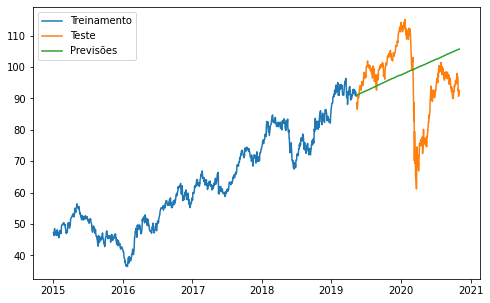

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(treinamento, label = 'Treinamento')
plt.plot(teste, label = 'Teste')
plt.plot(previsoes, label = 'Previsões')
plt.legend();

## Avaliação do ARIMA

In [ ]:
teste[0:2]

Date
2019-05-13    88.309998
2019-05-14    88.760002
Name: BOVA, dtype: float64

In [ ]:
previsoes[0:2]

,previsoes
Date,
2019-05-13,90.900022
2019-05-14,90.977381


In [ ]:
2.59 / 365

0.007095890410958904

In [ ]:
sum(abs(teste - previsoes['previsoes']) / len(teste))

10.260835771383379

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(teste, previsoes)

10.260835771383377

# Séries temporais em bases financeiras - Facebook Prophet

## Instalação e importação das bibliotecas

In [ ]:
!pip install fbprophet

In [ ]:
from fbprophet import Prophet
import pandas as pd

## Carregamento da base de dados

In [ ]:
dataset = pd.read_csv('acoes.csv', usecols=['Date', 'BOVA'])
dataset

,Date,BOVA
0,2015-01-02,47.259998
1,2015-01-05,46.320000
2,2015-01-06,46.580002
3,2015-01-07,48.150002
4,2015-01-08,48.509998
...,...,...
1441,2020-10-27,95.800003
1442,2020-10-28,92.430000
1443,2020-10-29,92.910004
1444,2020-10-30,90.660004


In [ ]:
dataset = dataset[['Date', 'BOVA']].rename(columns = {'Date': 'ds', 'BOVA': 'y'})
dataset

,ds,y
0,2015-01-02,47.259998
1,2015-01-05,46.320000
2,2015-01-06,46.580002
3,2015-01-07,48.150002
4,2015-01-08,48.509998
...,...,...
1441,2020-10-27,95.800003
1442,2020-10-28,92.430000
1443,2020-10-29,92.910004
1444,2020-10-30,90.660004


## Construção do modelo e previsões

In [ ]:
modelo = Prophet()
modelo.fit(dataset)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
futuro = modelo.make_future_dataframe(periods=90)
previsoes = modelo.predict(futuro)

In [ ]:
previsoes.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-02,48.991425,43.326123,58.025218,48.991425,48.991425,1.835024,1.835024,1.835024,0.401428,0.401428,0.401428,1.433596,1.433596,1.433596,0.0,0.0,0.0,50.826449
1,2015-01-05,49.018699,44.131989,58.364026,49.018699,49.018699,2.198627,2.198627,2.198627,0.342181,0.342181,0.342181,1.856447,1.856447,1.856447,0.0,0.0,0.0,51.217327
2,2015-01-06,49.027791,44.627367,58.812329,49.027791,49.027791,2.386577,2.386577,2.386577,0.389818,0.389818,0.389818,1.996759,1.996759,1.996759,0.0,0.0,0.0,51.414368
3,2015-01-07,49.036883,45.184607,58.753131,49.036883,49.036883,2.492839,2.492839,2.492839,0.359332,0.359332,0.359332,2.133507,2.133507,2.133507,0.0,0.0,0.0,51.529722
4,2015-01-08,49.045974,44.695340,59.092747,49.045974,49.045974,2.661502,2.661502,2.661502,0.396597,0.396597,0.396597,2.264905,2.264905,2.264905,0.0,0.0,0.0,51.707476


In [ ]:
len(dataset), len(previsoes)

(1446, 1536)

In [ ]:
len(previsoes) - len(dataset)

90

In [ ]:
previsoes.tail(90)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1446,2020-11-04,90.226469,85.704633,99.354671,90.226469,90.226469,2.341880,2.341880,2.341880,0.359332,0.359332,0.359332,1.982549,1.982549,1.982549,0.0,0.0,0.0,92.568350
1447,2020-11-05,90.204724,85.225525,99.670922,90.204724,90.204724,2.245200,2.245200,2.245200,0.396597,0.396597,0.396597,1.848603,1.848603,1.848603,0.0,0.0,0.0,92.449925
1448,2020-11-06,90.182980,84.812467,99.120040,90.182980,90.182980,2.119374,2.119374,2.119374,0.401428,0.401428,0.401428,1.717946,1.717946,1.717946,0.0,0.0,0.0,92.302354
1449,2020-11-07,90.161235,84.205118,98.100435,90.161235,90.161235,0.648184,0.648184,0.648184,-0.944678,-0.944678,-0.944678,1.592862,1.592862,1.592862,0.0,0.0,0.0,90.809419
1450,2020-11-08,90.139490,83.231435,97.788296,90.139490,90.139490,0.530774,0.530774,0.530774,-0.944678,-0.944678,-0.944678,1.475452,1.475452,1.475452,0.0,0.0,0.0,90.670264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,2021-01-28,88.378164,85.224619,98.657789,87.704819,89.120801,3.402828,3.402828,3.402828,0.396597,0.396597,0.396597,3.006231,3.006231,3.006231,0.0,0.0,0.0,91.780992
1532,2021-01-29,88.356420,84.046577,99.736192,87.672586,89.113426,3.408446,3.408446,3.408446,0.401428,0.401428,0.401428,3.007017,3.007017,3.007017,0.0,0.0,0.0,91.764865
1533,2021-01-30,88.334675,83.857731,97.404638,87.632486,89.105324,2.069184,2.069184,2.069184,-0.944678,-0.944678,-0.944678,3.013862,3.013862,3.013862,0.0,0.0,0.0,90.403858
1534,2021-01-31,88.312930,82.670587,97.673933,87.604808,89.096018,2.082822,2.082822,2.082822,-0.944678,-0.944678,-0.944678,3.027501,3.027501,3.027501,0.0,0.0,0.0,90.395753


## Gráfico das previsões

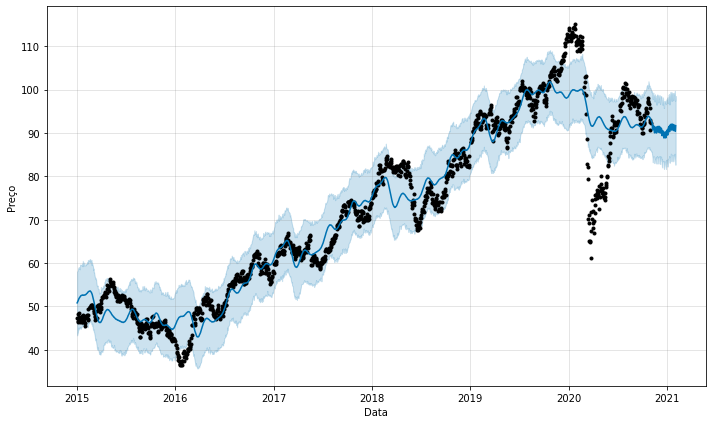

In [ ]:
modelo.plot(previsoes, xlabel = 'Data', ylabel = 'Preço');

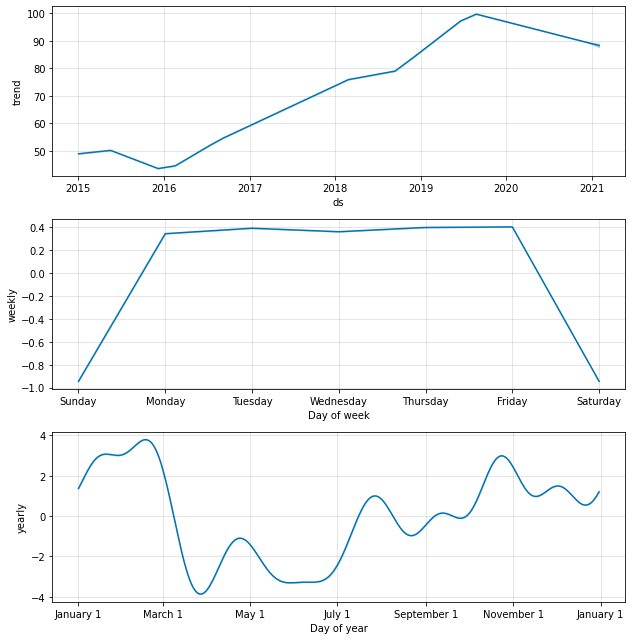

In [ ]:
modelo.plot_components(previsoes);

In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly

In [ ]:
plot_plotly(modelo, previsoes)

In [ ]:
plot_components_plotly(modelo, previsoes)

## Avaliação

In [ ]:
teste.shape

(365,)

In [ ]:
teste.tail()

Date
2020-10-27    95.800003
2020-10-28    92.430000
2020-10-29    92.910004
2020-10-30    90.660004
2020-11-03    92.410004
Name: BOVA, dtype: float64

In [ ]:
pred = modelo.make_future_dataframe(periods=0)
previsoes = modelo.predict(pred)

In [ ]:
previsoes.shape

(1446, 19)

In [ ]:
previsoes.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1441,2020-10-27,90.400427,86.365746,101.156538,90.400427,90.400427,3.266904,3.266904,3.266904,0.389818,0.389818,0.389818,2.877086,2.877086,2.877086,0.0,0.0,0.0,93.667331
1442,2020-10-28,90.378683,86.481255,100.567939,90.378683,90.378683,3.163925,3.163925,3.163925,0.359332,0.359332,0.359332,2.804593,2.804593,2.804593,0.0,0.0,0.0,93.542607
1443,2020-10-29,90.356938,86.014062,100.945953,90.356938,90.356938,3.113158,3.113158,3.113158,0.396597,0.396597,0.396597,2.716561,2.716561,2.716561,0.0,0.0,0.0,93.470096
1444,2020-10-30,90.335193,86.388495,100.865130,90.335193,90.335193,3.016340,3.016340,3.016340,0.401428,0.401428,0.401428,2.614911,2.614911,2.614911,0.0,0.0,0.0,93.351533
1445,2020-11-03,90.248214,85.852484,99.978593,90.248214,90.248214,2.507178,2.507178,2.507178,0.389818,0.389818,0.389818,2.117360,2.117360,2.117360,0.0,0.0,0.0,92.755392


In [ ]:
previsoes = previsoes['yhat'].tail(365)

In [ ]:
previsoes

1081    92.374527
1082    92.395009
1083    92.343171
1084    92.365431
1085    92.362015
          ...    
1441    93.667331
1442    93.542607
1443    93.470096
1444    93.351533
1445    92.755392
Name: yhat, Length: 365, dtype: float64

In [ ]:
mean_absolute_error(teste, previsoes)

6.330108237081639

## Exercício

In [ ]:
dataset = pd.read_csv('acoes_ex.csv', usecols = ['Date', 'AMBEV'])
dataset = dataset[['Date', 'AMBEV']].rename(columns = {'Date': 'ds', 'AMBEV': 'y'})
dataset

,ds,y
0,2015-01-02,16.020000
1,2015-01-05,15.730000
2,2015-01-06,16.330000
3,2015-01-07,16.559999
4,2015-01-08,16.540001
...,...,...
1441,2020-10-27,13.720000
1442,2020-10-28,13.370000
1443,2020-10-29,12.890000
1444,2020-10-30,12.180000


In [ ]:
from fbprophet import Prophet
model = Prophet()
model.fit(dataset)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
teste = dataset[1081:]
teste.shape

(365, 2)

In [ ]:
pred = model.make_future_dataframe(periods=0)
previsoes = model.predict(pred)

In [ ]:
previsoes = previsoes['yhat'].tail(365)

In [ ]:
previsoes

1081    17.707829
1082    17.695938
1083    17.650361
1084    17.645532
1085    17.636977
          ...    
1441    11.932300
1442    11.828164
1443    11.762127
1444    11.690023
1445    11.392166
Name: yhat, Length: 365, dtype: float64

In [ ]:
teste['y']

1081    17.010000
1082    16.940001
1083    16.610001
1084    16.639999
1085    16.490000
          ...    
1441    13.720000
1442    13.370000
1443    12.890000
1444    12.180000
1445    12.670000
Name: y, Length: 365, dtype: float64

In [ ]:
mean_absolute_error(teste['y'], previsoes)

1.034750865182137